# Agenda, week 3

1. Q&A
2. Sorting
3. Grouping (basic, advanced)
4. Pivot tables
5. Joining
6. Cleaning our data
7. Plotting
8. AMA (ask me anything)
9. What's next?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [9]:
filename = 'taxi.csv'

df = pd.read_csv(filename, 
                 index_col='tpep_pickup_datetime')

In [10]:
df.head()

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [11]:
# I want to find the shortest trip distances

df['trip_distance']

tpep_pickup_datetime
2015-06-02 11:19:29    1.63
2015-06-02 11:19:30    0.46
2015-06-02 11:19:31    0.87
2015-06-02 11:19:31    2.13
2015-06-02 11:19:32    1.40
                       ... 
2015-06-01 00:12:59    2.70
2015-06-01 00:12:59    4.50
2015-06-01 00:13:00    5.59
2015-06-01 00:13:02    1.54
2015-06-01 00:13:04    5.80
Name: trip_distance, Length: 9999, dtype: float64

In [12]:
# I can sort the values in this column with the sort_values method (for a series)

df['trip_distance'].sort_values()  # ascending order by default

tpep_pickup_datetime
2015-06-01 00:12:13     0.00
2015-06-04 15:18:09     0.00
2015-06-02 11:23:46     0.00
2015-06-01 00:08:03     0.00
2015-06-01 00:07:43     0.00
                       ...  
2015-06-04 15:17:25    34.84
2015-06-02 11:21:03    35.51
2015-06-01 00:02:42    37.20
2015-06-01 00:04:50    60.30
2015-06-01 00:00:58    64.60
Name: trip_distance, Length: 9999, dtype: float64

In [13]:
df['trip_distance'].sort_values().head(10)

tpep_pickup_datetime
2015-06-01 00:12:13    0.0
2015-06-04 15:18:09    0.0
2015-06-02 11:23:46    0.0
2015-06-01 00:08:03    0.0
2015-06-01 00:07:43    0.0
2015-06-04 15:23:02    0.0
2015-06-06 16:51:57    0.0
2015-06-04 15:18:40    0.0
2015-06-01 00:03:44    0.0
2015-06-04 15:17:31    0.0
Name: trip_distance, dtype: float64

In [14]:
# 10 longest trips

df['trip_distance'].sort_values().tail(10)

tpep_pickup_datetime
2015-06-01 00:00:16    29.78
2015-06-01 00:09:14    31.50
2015-06-01 00:00:13    31.90
2015-06-02 11:28:58    32.10
2015-06-01 00:01:19    32.40
2015-06-04 15:17:25    34.84
2015-06-02 11:21:03    35.51
2015-06-01 00:02:42    37.20
2015-06-01 00:04:50    60.30
2015-06-01 00:00:58    64.60
Name: trip_distance, dtype: float64

In [15]:
df['trip_distance'].sort_values(ascending=False).head(10)

tpep_pickup_datetime
2015-06-01 00:00:58    64.60
2015-06-01 00:04:50    60.30
2015-06-01 00:02:42    37.20
2015-06-02 11:21:03    35.51
2015-06-04 15:17:25    34.84
2015-06-01 00:01:19    32.40
2015-06-02 11:28:58    32.10
2015-06-01 00:00:13    31.90
2015-06-01 00:09:14    31.50
2015-06-01 00:00:16    29.78
Name: trip_distance, dtype: float64

In [16]:
# we can also sort a column by the index!

df['trip_distance'].sort_index()

tpep_pickup_datetime
2015-06-01 00:00:00     1.00
2015-06-01 00:00:00     0.90
2015-06-01 00:00:00     1.40
2015-06-01 00:00:01     7.41
2015-06-01 00:00:01     8.15
                       ...  
2015-06-06 16:53:56     1.20
2015-06-06 16:53:56     0.58
2015-06-06 16:53:56    17.36
2015-06-06 16:53:56     0.76
2015-06-06 16:53:57     0.50
Name: trip_distance, Length: 9999, dtype: float64

In [17]:
# if I want the 5 earliest trips, I can say

df['trip_distance'].sort_index().head(5)

tpep_pickup_datetime
2015-06-01 00:00:00    1.00
2015-06-01 00:00:00    0.90
2015-06-01 00:00:00    1.40
2015-06-01 00:00:01    7.41
2015-06-01 00:00:01    8.15
Name: trip_distance, dtype: float64

In [18]:
df['trip_distance'].sort_index().tail(5)

tpep_pickup_datetime
2015-06-06 16:53:56     1.20
2015-06-06 16:53:56     0.58
2015-06-06 16:53:56    17.36
2015-06-06 16:53:56     0.76
2015-06-06 16:53:57     0.50
Name: trip_distance, dtype: float64

# Sorting

When you sort a series (column), you can choose from between two different types of sort:

- `sort_index`, to get a new series back based on the index, sorted in ascending order (by default)
- `sort_values`, to get a new series back based on the values, sorted in ascending order (by default)

# What about sorting data frames?

My rule of thumb in Pandas is: If you have a method that works on a series, then the same method can be applied, to a data frame. You'll get a result for each column.

- If the series method returns a scalar value, then you'll get a series back when you invoke the data frame's method, with the columns providing the index.
- If the series method returns a series, then you'll get a data frame back, with the column names coming from the data frame.

In [19]:
df.sort_index()

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:00,1,2015-06-01 00:06:12,1,1.00,-73.988739,40.756832,1,N,-73.974701,40.757038,2,6.0,0.5,0.5,0.00,0.00,0.3,7.30
2015-06-01 00:00:00,2,2015-06-01 00:00:00,1,0.90,-73.984428,40.737209,1,N,-73.979935,40.749088,1,11.5,1.0,0.5,2.00,0.00,0.3,15.30
2015-06-01 00:00:00,2,2015-06-01 00:00:00,2,1.40,-73.987160,40.738972,1,N,-73.976288,40.755573,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30
2015-06-01 00:00:01,2,2015-06-01 00:11:29,1,7.41,-73.874634,40.774082,1,N,-73.944809,40.779282,1,21.0,0.5,0.5,5.57,5.54,0.3,33.41
2015-06-01 00:00:01,2,2015-06-01 00:24:48,1,8.15,-74.006844,40.730572,1,N,-73.946342,40.811508,1,26.5,0.5,0.5,2.50,0.00,0.3,30.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-06 16:53:56,1,2015-06-06 17:00:40,1,1.20,-73.992592,40.730629,1,N,-73.998161,40.717072,1,6.5,0.0,0.5,2.19,0.00,0.3,9.49
2015-06-06 16:53:56,2,2015-06-06 16:56:18,1,0.58,-73.949013,40.788616,1,N,-73.952942,40.781727,1,4.0,0.0,0.5,0.95,0.00,0.3,5.75
2015-06-06 16:53:56,2,2015-06-06 17:54:22,1,17.36,-73.790520,40.646461,2,N,-73.969048,40.763062,1,52.0,0.0,0.5,10.66,5.54,0.3,69.00


In [21]:
# what about sort_values?

df.sort_values('trip_distance')  # you must say by what column you want to sort!

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:12:13,1,2015-06-01 00:13:47,1,0.00,-74.005714,40.740582,1,N,-74.005417,40.740803,3,3.00,0.5,0.5,0.00,0.00,0.3,4.30
2015-06-04 15:18:09,1,2015-06-04 15:18:09,2,0.00,-74.002953,40.749256,1,N,0.000000,0.000000,2,3.00,0.0,0.5,0.00,0.00,0.3,3.80
2015-06-02 11:23:46,2,2015-06-02 11:24:07,4,0.00,-73.956963,40.766392,1,N,-73.956970,40.766418,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30
2015-06-01 00:08:03,2,2015-06-01 00:08:08,1,0.00,-73.962463,40.755138,2,N,-73.962463,40.755138,1,52.00,0.0,0.5,10.56,0.00,0.3,63.36
2015-06-01 00:07:43,1,2015-06-01 00:07:43,1,0.00,-74.007530,40.740753,1,N,0.000000,0.000000,2,5.00,0.5,0.5,0.00,0.00,0.3,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-04 15:17:25,2,2015-06-04 17:05:42,1,34.84,-73.787354,40.641670,5,N,-74.177376,40.690781,2,120.00,0.0,0.0,0.00,17.29,0.3,137.59
2015-06-02 11:21:03,2,2015-06-02 12:16:47,1,35.51,-73.789169,40.647758,3,N,-74.176750,40.662647,1,112.00,0.0,0.0,0.00,22.83,0.3,135.13
2015-06-01 00:02:42,1,2015-06-01 00:03:38,1,37.20,-73.550156,41.043472,5,N,-73.550102,41.043495,1,184.00,0.0,0.0,20.00,5.84,0.3,210.14


In [25]:
# what if I want the dropoff times for the 5 longest trips

(
    df
    .sort_values('trip_distance')    # sort the data frame, in ascending order, by trip_distance
    ['tpep_dropoff_datetime']        # grab the tpep_dropoff_datetime column
    .tail(5)                         # get the 5 final values, corresponding to the 5 longest trips
)

tpep_pickup_datetime
2015-06-04 15:17:25    2015-06-04 17:05:42
2015-06-02 11:21:03    2015-06-02 12:16:47
2015-06-01 00:02:42    2015-06-01 00:03:38
2015-06-01 00:04:50    2015-06-01 01:31:44
2015-06-01 00:00:58    2015-06-01 01:22:05
Name: tpep_dropoff_datetime, dtype: object

In [28]:
# things can get even better: What if I want to sort by two or more columns?
# that is, I'll sort primarily by trip_distance, but if two trips have the same distance, then I'll secondarily
# sort by total_amount.

(
    df
    .sort_values(['trip_distance', 'total_amount'])    # sort the data frame, in ascending order, by trip_distance, then by total_amount
    [['trip_distance', 'total_amount']]
    .head(20)
)

,trip_distance,total_amount
tpep_pickup_datetime,,
2015-06-02 11:24:35,0.0,-3.3
2015-06-02 11:20:23,0.0,2.3
2015-06-02 11:19:46,0.0,3.3
2015-06-02 11:24:35,0.0,3.3
2015-06-02 11:23:46,0.0,3.3
2015-06-02 11:31:47,0.0,3.3
2015-06-02 11:28:53,0.0,3.3
2015-06-02 11:29:48,0.0,3.3
2015-06-02 11:31:46,0.0,3.3


In [32]:
# we can even use the special nlargest and nsmallest methods!

# get the 10 rows from df in which trip_distance has the largest values
df.nlargest(columns='trip_distance', n=10)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:58,1,2015-06-01 01:22:05,1,64.60,0.000000,0.000000,5,N,0.000000,0.000000,2,69.66,0.0,0.0,0.00,10.00,0.3,79.96
2015-06-01 00:04:50,1,2015-06-01 01:31:44,1,60.30,-73.994415,40.750603,5,N,-73.420250,41.137344,1,150.00,0.0,0.0,0.00,9.75,0.3,160.05
2015-06-01 00:02:42,1,2015-06-01 00:03:38,1,37.20,-73.550156,41.043472,5,N,-73.550102,41.043495,1,184.00,0.0,0.0,20.00,5.84,0.3,210.14
2015-06-02 11:21:03,2,2015-06-02 12:16:47,1,35.51,-73.789169,40.647758,3,N,-74.176750,40.662647,1,112.00,0.0,0.0,0.00,22.83,0.3,135.13
2015-06-04 15:17:25,2,2015-06-04 17:05:42,1,34.84,-73.787354,40.641670,5,N,-74.177376,40.690781,2,120.00,0.0,0.0,0.00,17.29,0.3,137.59
2015-06-01 00:01:19,2,2015-06-01 00:40:12,1,32.40,-73.781425,40.644905,2,N,-73.974174,40.731441,1,52.00,0.0,0.5,10.56,0.00,0.3,63.36
2015-06-02 11:28:58,1,2015-06-02 12:13:29,1,32.10,-73.873085,40.774124,4,N,-73.957283,41.098221,1,129.00,0.0,0.5,27.05,5.54,0.3,162.39
2015-06-01 00:00:13,1,2015-06-01 00:41:05,1,31.90,-73.875206,40.770382,5,N,-73.549629,41.043552,1,210.00,0.0,0.0,42.05,0.00,0.3,252.35
2015-06-01 00:09:14,1,2015-06-01 01:03:11,1,31.50,-73.802437,40.677372,5,N,-74.255424,40.745316,2,140.00,0.0,0.0,0.00,9.75,0.3,150.05


In [33]:
df.nsmallest(columns='trip_distance', n=10)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:21:25,1,2015-06-02 11:21:50,1,0.0,-73.978493,40.748562,1,N,-73.978493,40.748604,1,2.5,0.0,0.5,1.00,0.0,0.3,4.30
2015-06-02 11:19:46,1,2015-06-02 12:26:33,1,0.0,-73.983200,40.766949,1,N,-73.990410,40.766872,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
2015-06-02 11:20:23,2,2015-06-02 11:20:23,2,0.0,-73.937851,40.758236,1,N,0.000000,0.000000,2,1.5,0.0,0.5,0.00,0.0,0.3,2.30
2015-06-02 11:24:33,1,2015-06-02 11:24:50,1,0.0,-73.996460,40.732124,5,N,-73.996429,40.732147,1,12.0,0.0,0.0,3.05,0.0,0.3,15.35
2015-06-02 11:24:35,2,2015-06-02 11:24:40,1,0.0,0.000000,0.000000,1,N,-73.749077,40.707611,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
2015-06-02 11:20:46,2,2015-06-02 11:23:52,5,0.0,-73.971809,40.764050,1,N,-73.966827,40.770039,1,4.0,0.0,0.5,1.00,0.0,0.3,5.80
2015-06-02 11:23:16,2,2015-06-02 11:25:01,1,0.0,-73.937614,40.758091,1,N,-73.937546,40.758114,1,3.0,0.0,0.5,0.00,0.0,0.3,3.80
2015-06-02 11:23:46,2,2015-06-02 11:24:07,4,0.0,-73.956963,40.766392,1,N,-73.956970,40.766418,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
2015-06-02 11:24:27,2,2015-06-02 11:35:33,1,0.0,-73.979347,40.752792,1,N,-73.970490,40.764420,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00


In [34]:
!head olympic_athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

# Exercise: Retrieve Olympic records

1. Find the 10 heaviest athletes to compete in the Olympics. What are their names? What teams did they play for?
2. Find the 10 shortest athletes. How old were they, on average?

In [35]:
df = pd.read_csv('olympic_athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [39]:
(
    df
    .sort_values('Weight', ascending=False)
    .head(10)
    [['Name', 'Team']]
)

,Name,Team
23156,"Ricardo Blas, Jr.",Guam
23155,"Ricardo Blas, Jr.",Guam
205467,Aytami Ruano Vega,Spain
75031,Marek Galiski,Poland
237040,"Christopher J. ""Chris"" Taylor",United States
237039,"Christopher J. ""Chris"" Taylor",United States
206352,Valentyn Rusliakov,Ukraine
206004,Leonel Wilfredo Ruz Carmona,Venezuela
94363,"Marcus Jerrold ""Mark"" Henry",United States
94362,"Marcus Jerrold ""Mark"" Henry",United States


In [41]:
(
    df
    [['Name', 'Team', 'Weight']]
    .drop_duplicates()  
    .sort_values('Weight', ascending=False)
    .head(10)
)

,Name,Team,Weight
23155,"Ricardo Blas, Jr.",Guam,214.0
205467,Aytami Ruano Vega,Spain,198.0
75031,Marek Galiski,Poland,190.0
237039,"Christopher J. ""Chris"" Taylor",United States,182.0
206352,Valentyn Rusliakov,Ukraine,180.0
206004,Leonel Wilfredo Ruz Carmona,Venezuela,178.0
94362,"Marcus Jerrold ""Mark"" Henry",United States,176.5
173166,Dmitry Yuryevich Nosov,Russia,175.0
168480,Illie Daniel Natea,Romania,170.0
262338,Janusz Wojnarowicz,Poland,170.0


In [42]:
(
    df
    [['Name', 'Team', 'Weight']]
    .drop_duplicates()  
    .nlargest(columns='Weight', n=10)
)

,Name,Team,Weight
23155,"Ricardo Blas, Jr.",Guam,214.0
205467,Aytami Ruano Vega,Spain,198.0
75031,Marek Galiski,Poland,190.0
237039,"Christopher J. ""Chris"" Taylor",United States,182.0
206352,Valentyn Rusliakov,Ukraine,180.0
206004,Leonel Wilfredo Ruz Carmona,Venezuela,178.0
94362,"Marcus Jerrold ""Mark"" Henry",United States,176.5
173166,Dmitry Yuryevich Nosov,Russia,175.0
39181,Andrey Ivanovich Chemerkin,Russia,170.0
168480,Illie Daniel Natea,Romania,170.0


In [46]:
# Find the 10 shortest athletes. How old were they, on average?

(
    df
    [['Age', 'Height']]
    .drop_duplicates()  
    .nsmallest(columns='Height', n=10)
    ['Age']
    .mean()
)

np.float64(21.25)

In [47]:

(
    df
    [['Age', 'Height']]
    .drop_duplicates()  
    .nlargest(columns='Height', n=10)
    ['Age']
    .mean()
)

np.float64(25.2)

In [48]:
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(
    subset: Hashable | Sequence[Hashable] | None = None,
    *,
    keep: DropKeep = 'first',
    inplace: bool = False,
    ignore_index: bool = False
) -> DataFrame | None method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.

    Considering certain columns is optional. Indexes, including time indexes
    are ignored.

    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.

        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.

    inplace : bool, default ``False``
        Whether to modify th

In [50]:
(
    df
    .drop_duplicates(subset=['Name', 'Team'])  
    .nlargest(columns='Height', n=10)
)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
207374,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
269053,134621,Zhang Zhaoxu,M,24.0,221.0,110.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
141983,71228,"Lucien James ""Luc"" Longley",M,19.0,220.0,135.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
240656,120589,Volodymyr Petrovych Tkachenko,M,18.0,220.0,110.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Bronze


# Grouping

Let's say that I have the taxi data loaded. I want to know, for taxi rides with 1 passenger, what was the mean `trip_distance`?

In [53]:
df = pd.read_csv('taxi.csv')

(
    df
    .loc[
        df['passenger_count'] == 1,   # row selector
        'trip_distance'  # column selector
    ]
    .mean()
)   

np.float64(3.0923380047176354)

In [54]:
# Let's say that I have the taxi data loaded. I want to know, for taxi rides with 2 passengers, what was the mean `trip_distance`?

(
    df
    .loc[
        df['passenger_count'] == 2,   # row selector
        'trip_distance'  # column selector
    ]
    .mean()
)   

np.float64(3.3843869002284848)

In [55]:
# Let's say that I have the taxi data loaded. I want to know, for taxi rides with 3 passengers, what was the mean `trip_distance`?

(
    df
    .loc[
        df['passenger_count'] == 3,   # row selector
        'trip_distance'  # column selector
    ]
    .mean()
)   

np.float64(3.3423891625615765)

# `groupby`

The solution is to use `groupby`. When we use `groupby`, we're saying:

- We have a "categorical" column, meaning one with a limited number of values.
- We want, for each unique value in that categorical column, to calculate a function on a numeric column.

We need two columns and a method:
- The categorical; the unique values from this categorical will be the index of our new series
- The numeric; this is the column on which methods will be invoked
- The method -- typically `mean`, `std`, `count`, or `sum`, but there are many others, too.



In [56]:
df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

# Examples of where you might use grouping

1. For each country, what was the total number of sales this year?
2. For each product, what is the mean revenue?
3. For each student, what was the mean test score for the year?

# Exercise: Olympic grouping

1. For each team, what was the mean athlete height? Which 5 teams were tallest, on average?
2. For each team, what was the number of medals they accumulated? Note that the `count` method counts values that are non-NaN.

In [65]:
df = pd.read_csv('olympic_athlete_events.csv',
                usecols=['Height', 'Team', 'Medal'])

df.head()

,Height,Team,Medal
0,180.0,China,NaN
1,170.0,China,NaN
2,NaN,Denmark,NaN
3,NaN,Denmark/Sweden,Gold
4,185.0,Netherlands,NaN


In [66]:
df.groupby('Team')['Height'].mean()

Team
30. Februar              171.500000
A North American Team           NaN
Acipactli                174.666667
Acturus                         NaN
Afghanistan              170.592593
                            ...    
Zambia                   172.828125
Zefyros                  180.000000
Zimbabwe                 173.325175
Zut                             NaN
rn-2                     176.000000
Name: Height, Length: 1184, dtype: float64

In [67]:
(
    df
    .groupby('Team')['Height'].mean()
    .nlargest(5)
)

Team
Puerto Rico-1           196.000000
England-1               193.000000
France/Great Britain    191.000000
Nadine                  190.000000
Ireland-1               189.666667
Name: Height, dtype: float64

In [74]:
# 2. For each team, what was the number of medals they accumulated? Note that the `count` method counts values that are non-NaN.

(
    df
    .groupby('Team')['Medal'].count()
    .sort_values(ascending=False)
    .head(10)
)

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64

# Next up

- More grouping
- Pivot tables

# More complex grouping

Remember one of my rules of thumb: Wherever we can name a single column (as a string), we can name multiple columns (as a list of strings).

In [76]:
df = pd.read_csv('taxi.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [77]:
# for every unique value of passenger_count
# calculate the mean
# on trip_distance

#           categorical col.    data column    aggregation method
df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

In [78]:
# what if I want to calculate the mean trip_distance *and* the mean total_amount?
# I can do that, by passing a list of columns inside of the [] for the data column
# note that this means double []!

#           categorical col.    data column                      aggregation method
df.groupby('passenger_count')[['trip_distance', 'total_amount']].mean()

,trip_distance,total_amount
passenger_count,,
0,4.600000,25.570000
1,3.092338,17.368569
2,3.384387,18.406306
3,3.342389,17.994704
4,3.628901,18.881648
5,3.182712,17.211269
6,3.170976,17.401355


In [79]:
# what if I have more than one category? For example, I want to calculate not only for
# each product, but each version of a product? Or not only for each country, but each
# city in a country?

# once again, we can put more than one column name in groupby, by passing a list of 
# strings (column names), rather than a single column name

#           categorical col.                    data column    aggregation method
df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

# Multi-index?!?!

The series we got back has what Pandas calls a "multi-index." That means the index has more than one component. In this case, it has two -- `passenger_count` and `payment_type`. You can retrieve from a multi-index using `.loc`, passing a tuple for the two values. Or you can pass only one value and it'll be used on `passenger_count`, since that's the outer layer of the multi-index.

In [80]:
(
    df
    .groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()
    .loc[5]
)

payment_type
1    3.51875
2    2.64505
Name: trip_distance, dtype: float64

# Multiple aggregation methods

If you want to run more than one aggregation method, you can -- just use `agg` instead of a regular method name, and pass a list of strings, each being the name of a method. (Yes, it's weird to pass them as strings...)

In [81]:
#           categorical col.    data column    aggregation method
df.groupby('passenger_count')['trip_distance'].agg(['mean', 'std'])

,mean,std
passenger_count,,
0,4.600000,4.666905
1,3.092338,4.020187
2,3.384387,4.242826
3,3.342389,3.822041
4,3.628901,4.351369
5,3.182712,3.969468
6,3.170976,3.759807


# Exercise: Olympic grouping

1. Load the Olympic data into a data frame.
2. For each sport, find the mean height and weight. 
3. For each combination of year and season, find the mean height of athletes.
4. For each sport, find the mean + std for height.

In [82]:
df = pd.read_csv('olympic_athlete_events.csv')

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [84]:
#      categorical col.    data column    aggregation method

(
    df
    .groupby('Sport')[['Height', 'Weight']].mean() 
    .sort_values('Height', ascending=False)
)

,Height,Weight
Sport,,
Basketball,190.869879,85.777053
Volleyball,186.994822,78.900214
Beach Volleyball,186.144954,79.089219
Water Polo,184.834648,84.566446
Rowing,184.172222,80.035863
...,...,...
Basque Pelota,NaN,NaN
Cricket,NaN,NaN
Croquet,NaN,NaN


In [85]:
s = Series([10, 20, 30, np.nan, 100, 200])
s.mean()

np.float64(72.0)

In [86]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(
    by=None,
    axis: Axis | lib.NoDefault = <no_default>,
    level: IndexLabel | None = None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    observed: bool | lib.NoDefault = <no_default>,
    dropna: bool = True
) -> DataFrameGroupBy method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.

    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.

    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the 

In [89]:
(
    df
    .groupby('Sport', dropna=False)[['Height', 'Weight']].mean() 
    # .sort_values('Height', ascending=False)
)

,Height,Weight
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,173.489052,72.068110
Alpinism,NaN,NaN
Archery,173.203085,70.011135
Art Competitions,174.644068,75.290909
...,...,...
Tug-Of-War,182.480000,95.615385
Volleyball,186.994822,78.900214
Water Polo,184.834648,84.566446


In [ ]:
# JS

TypeError                                 Traceback (most recent call last)
Cell In[15], line 1
----> 1 {
      2         df
      3         .groupby('Sport')[['Height','Weight']].mean()
      4 }

TypeError: unhashable type: 'DataFrame'

In [90]:
# For each combination of year and season, find the mean height of athletes.

#           categorical col.    data column   aggregation method
df.groupby(['Year', 'Season'])['Height'].mean()

Year  Season
1896  Summer    172.739130
1900  Summer    176.637931
1904  Summer    175.788732
1906  Summer    178.206226
1908  Summer    177.543158
1912  Summer    177.447989
1920  Summer    175.752282
1924  Summer    175.239548
      Winter    172.213483
1928  Summer    175.331770
      Winter    173.975410
1932  Summer    174.371681
      Winter    173.433673
1936  Summer    176.112689
      Winter    172.705882
1948  Summer    176.600190
      Winter    172.293103
1952  Summer    174.183023
      Winter    173.540000
1956  Summer    174.116567
      Winter    172.433140
1960  Summer    173.310287
      Winter    170.701493
1964  Summer    173.690848
      Winter    172.133674
1968  Summer    174.087484
      Winter    173.289689
1972  Summer    174.745758
      Winter    173.463415
1976  Summer    175.053724
      Winter    174.099032
1980  Summer    175.634392
      Winter    174.991354
1984  Summer    175.573516
      Winter    175.390194
1988  Summer    175.683249
      Winter   

In [91]:
# For each sport, find the mean + std for height.

#   categorical col.  data column    aggregation method
df.groupby('Sport')['Height'].agg(['mean', 'std'])

,mean,std
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,173.489052,7.848716
Alpinism,NaN,NaN
Archery,173.203085,8.442945
Art Competitions,174.644068,9.286183
...,...,...
Tug-Of-War,182.480000,6.232442
Volleyball,186.994822,10.456854
Water Polo,184.834648,8.560613


In [92]:
# what if I want the max height for each sport?

df.groupby('Sport')['Height'].max()

Sport
Aeronautics           NaN
Alpine Skiing       200.0
Alpinism              NaN
Archery             197.0
Art Competitions    190.0
                    ...  
Tug-Of-War          195.0
Volleyball          219.0
Water Polo          206.0
Weightlifting       205.0
Wrestling           214.0
Name: Height, Length: 66, dtype: float64

# We get get even hairier! We can have more than one on each dimension!



In [93]:
df = pd.read_csv('taxi.csv')

#                    categorical col.            data column                        aggregation method
df.groupby(['passenger_count', 'payment_type'])[['trip_distance', 'total_amount']].agg(['mean', 'std'])

trip_distance           total_amount           
                                      mean       std         mean        std
passenger_count payment_type                                                
0               1                 4.600000  4.666905    25.570000  15.301791
1               1                 3.408621  4.172901    19.883125  16.935936
                2                 2.613389  3.728080    13.512674  11.209777
                3                 1.900968  3.213310    12.020645  15.554241
                4                 1.718000  1.759579     7.780000  10.489376
2               1                 3.625507  4.355015    20.934013  16.840061
                2                 3.016911  3.994380    14.892018  12.862015
                3                11.700000  9.134002    42.480000  27.061360
3               1                 3.221504  3.481454    18.779292  13.464702
                2                 3.493575  4.227824    16.988436  14.040910
                4                 3.600000       NaN    20.800000        NaN
4               1                 4.161136  4.707253    22.454773  17.346240
                2                 3.130638  3.950088    15.536596  11.779893
5               1                 3.518750  4.261502    19.634750  15.734323
                2                 2.645050  3.392717    13.333700   9.596857
6               1                 3.178606  3.499148    18.980288  13.856405
                2                 3.161118  4.083165    15.361491  12.447223

In [96]:
(
    df
    .groupby(['passenger_count', 'payment_type'])
    [['trip_distance', 'total_amount']]
    .agg(['mean', 'std'])

    # get mean trip_distance
    [('trip_distance', 'mean')]
)

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: (trip_distance, mean), dtype: float64

# Pivot tables

Pivot tables are frequently used to summarize data. You have a data frame, and you want to summarize it along the rows with one category and along the columns with another. 

The big secret is that pivot tables are just another version of a 2D groupby. In other words, if you understand how to invoke `groupby` on two categorical columns, then you understand what pivot tables are doing.

In Pandas, we have a `pivot` method and a `pivot_table` method. I never use the first. I always use the second.

When you invoke `pivot_table`, you provide the following:

- index: the categorical column whose unique values will be in the index
- columns: the categorical column whose unique values will be in the column names
- values: the data column whose values will be run through the aggregation method
- aggfunc: the aggregation method


In [98]:
df.pivot_table(index='passenger_count',
               columns='payment_type',
               values='trip_distance',
               aggfunc='mean')

payment_type,1,2,3,4
passenger_count,,,,
0,4.600000,NaN,NaN,NaN
1,3.408621,2.613389,1.900968,1.718
2,3.625507,3.016911,11.700000,NaN
3,3.221504,3.493575,NaN,3.600
4,4.161136,3.130638,NaN,NaN
5,3.518750,2.645050,NaN,NaN
6,3.178606,3.161118,NaN,NaN


In [99]:
# the above is basically the same as

df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

In [101]:
# in our taxi data, every taxi meter was made by one of two companies, VendorID 1 or 2
# I'd like to know which vendor has, on average, higher tips as a percentage of the total_amount.
# Let's compare this also with passenger_count.

df['tip_percentage'] = df['tip_amount'] / df['fare_amount']

df.pivot_table(index='passenger_count',
               columns='VendorID',
               values='tip_percentage',
               aggfunc='mean')

VendorID,1,2
passenger_count,,
0,0.262814,NaN
1,0.126479,0.123673
2,inf,0.120607
3,0.097711,0.131348
4,0.202413,0.103341
5,0.000000,0.127159
6,NaN,0.114816


# Exercise: Olympic pivots

1. Create a pivot table in which the rows are `Sport` and the columns are `Sex`. Show the mean height for each intersection.
2. Do the same thing for both height and weight. What happens if you pass more than one value to the `values` argument in `pivot_table`?

In [102]:
df = pd.read_csv('olympic_athlete_events.csv')



In [103]:
# for each sport, what is the mean height for men vs. women?

df.groupby(['Sport', 'Sex'])['Height'].mean()

Sport          Sex
Aeronautics    M             NaN
Alpine Skiing  F      167.221001
               M      177.891374
Alpinism       F             NaN
               M             NaN
                         ...    
Water Polo     M      186.801739
Weightlifting  F      160.467391
               M      169.153061
Wrestling      F      163.865132
               M      172.870686
Name: Height, Length: 116, dtype: float64

In [104]:
df.pivot_table(index='Sport',
               columns='Sex',
               values='Height',
               aggfunc='mean')

Sex,F,M
Sport,,
Alpine Skiing,167.221001,177.891374
Archery,167.166483,178.477842
Art Competitions,160.000000,174.896552
Athletics,169.285714,179.768303
Badminton,168.438519,179.620787
Baseball,NaN,182.599291
Basketball,182.454836,194.872624
Beach Volleyball,178.866667,193.290909
Biathlon,166.540541,178.856281


In [105]:
# how much taller are men than women in each sport?

df.pivot_table(index='Sport',
               columns='Sex',
               values='Height',
               aggfunc='mean').diff(axis='columns')  

Sex,F,M
Sport,,
Alpine Skiing,NaN,10.670373
Archery,NaN,11.311359
Art Competitions,NaN,14.896552
Athletics,NaN,10.482588
Badminton,NaN,11.182268
Baseball,NaN,NaN
Basketball,NaN,12.417787
Beach Volleyball,NaN,14.424242
Biathlon,NaN,12.315741


In [106]:
# Do the same thing for both height and weight. What happens if you pass more than one value to the values argument in pivot_table?

df.pivot_table(index='Sport',
               columns='Sex',
               values=['Height', 'Weight'],
               aggfunc='mean')

Height                 Weight           
Sex                                 F           M          F          M
Sport                                                                  
Alpine Skiing              167.221001  177.891374  62.640307  78.626035
Archery                    167.166483  178.477842  62.013575  77.066866
Art Competitions           160.000000  174.896552        NaN  75.290909
Athletics                  169.285714  179.768303  60.239798  73.839129
Badminton                  168.438519  179.620787  61.586364  74.362536
Baseball                          NaN  182.599291        NaN  85.707792
Basketball                 182.454836  194.872624  73.685170  91.683529
Beach Volleyball           178.866667  193.290909  68.350943  89.512821
Biathlon                   166.540541  178.856281  57.306586  72.632123
Bobsleigh                  173.181818  181.992015  72.804196  90.387385
Boxing                     168.800000  172.888199  61.836066  65.296280
Canoeing                   169.628995  181.212532  64.878906  79.972378
Cross Country Skiing       166.650819  177.757682  57.488018  71.700832
Curling                    167.520362  180.709251  62.888350  81.465686
Cycling                    168.018629  177.745402  59.770553  72.190234
Diving                     161.173604  171.555352  53.566563  67.069378
Equestrianism              167.875755  176.563172  58.601908  70.924559
Fencing                    168.954292  180.014125  60.656144  75.381977
Figure Skating             160.610849  176.062271  49.861039  69.591644
Football                   167.676142  177.480339  60.925813  73.086644
Freestyle Skiing           164.777262  176.442424  58.352459  74.648148
Golf                       168.733333  178.985915  63.436364  79.245283
Gymnastics                 156.143325  167.644438  47.791276  63.343605
Handball                   174.840278  188.778373  68.876851  89.387914
Hockey                     166.125267  176.852577  60.530935  73.343761
Ice Hockey                 168.209549  180.991444  65.712865  83.775593
Jeu De Paume                      NaN  178.500000        NaN        NaN
Judo                       166.267000  177.487500  67.067164  83.573945
Lacrosse                          NaN  174.000000        NaN  76.714286
Luge                       169.065527  179.242483  66.908832  80.803311
Modern Pentathlon          170.073171  179.087688  58.310976  72.068824
Motorboating                      NaN  181.000000        NaN  77.000000
Nordic Combined                   NaN  176.504464        NaN  66.909560
Polo                              NaN  175.500000        NaN        NaN
Racquets                          NaN  176.000000        NaN        NaN
Rhythmic Gymnastics        167.870253         NaN  48.760976        NaN
Rowing                     176.771079  186.882698  70.102214  83.665663
Rugby                             NaN  176.096774        NaN  77.533333
Rugby Sevens               167.636986  182.834437  66.628378  91.006623
Sailing                    169.510808  180.156897  62.777268  78.849712
Shooting                   164.932934  175.977163  61.143243  77.834960
Short Track Speed Skating  164.530447  175.611482  57.123139  71.401869
Skeleton                   167.923077  181.072727  61.000000  82.018349
Ski Jumping                164.600000  176.579710  52.615385  65.245881
Snowboarding               166.298077  178.526012  60.444175  76.861598
Softball                   169.395089         NaN  67.471655        NaN
Speed Skating              167.420704  179.183060  62.010046  76.300403
Swimming                   171.468735  184.310928  61.482748  78.040567
Synchronized Swimming      168.481481         NaN  55.863529        NaN
Table Tennis               165.064965  177.008630  58.027778  71.414239
Taekwondo                  170.811644  182.418301  61.136824  74.653595
Tennis                     172.335736  184.847806  62.094398  78.842912
Trampolining               161.733333  171.368421  52.893333  65.837838

# Next up

1. Joining and merging
2. Cleaning our data
3. Plotting
4. AMA

# Joining

It's common to have our data spread across multiple data frames. By "joining," we combine those data frames into a new, single data frame that uses data from both.

The question is, how do we combine them? The answer is most typically along the indexes. The index of one data frame will match the index of the other -- not in order, but in its contents -- and that'll give us a new data frame with the same index contents as the two original ones.

What happens if an index value exists only in one? What if it exists in more than one? This is where things get complex.

In [108]:
# create a data frame with month numbers and (made-up) prices

oil_prices = DataFrame([[1, 60],
                        [2, 65],
                        [3, 63],
                        [4, 69],
                        [5, 72],
                        [6, 65],
                        [7, 60],
                        [8, 55],
                        [9, 60],
                        [10, 62],
                        [11, 63]],
                      columns=['month', 'price'])
oil_prices
                                                

,month,price
0,1,60
1,2,65
2,3,63
3,4,69
4,5,72
5,6,65
6,7,60
7,8,55
8,9,60
9,10,62


In [112]:
# let's create a new data frame in which 
# we have month numbers and names

months = DataFrame([[1, 'January'],
                     [2, 'February'],
                     [3, 'March'],
                     [4, 'April'],
                     [5, 'May'],
                     [6, 'June'],
                     [7, 'July'],
                     [8, 'August'],
                     [9, 'September'],
                     [10, 'October'],
                    [11, 'November'],
                     [12, 'December']],
                  columns=['number', 'name'])

months

,number,name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


In [121]:
# how can I get oil prices with the month names, rather than the month numbers?

# solution 1: use the "merge" method in Pandas. This lets us combine data frames 
# on any columns, not just the indexes.

pd.merge(left=oil_prices,        # the "left" data frame in our merge
         right=months,           # the "right" data frame in our merge
         left_on='month',        # what column in the left data frame should we use for merging?
         right_on='number')      # what column in the right data frame should we use for merging?

# Pandas will look at these two data frames, and combine them wherever the oil_prices.month matches months.number

,month,price,number,name
0,1,60,1,January
1,2,65,2,February
2,3,63,3,March
3,4,69,4,April
4,5,72,5,May
5,6,65,6,June
6,7,60,7,July
7,8,55,8,August
8,9,60,9,September
9,10,62,10,October


In [123]:
# option 2: join -- but this only works on the indexes.

oil_prices.set_index('month').join(months.set_index('number'))

,price,name
month,,
1,60,January
2,65,February
3,63,March
4,69,April
5,72,May
6,65,June
7,60,July
8,55,August
9,60,September


In [128]:
new_oil_prices = DataFrame([
                        [1, 60, 2024],
                        [2, 65, 2024],
                        [3, 63, 2024],
                        [4, 69, 2024],
                        [5, 72, 2024],
                        [6, 65, 2024],
                        [7, 60, 2024],
                        [8, 55, 2024],
                        [9, 60, 2024],
                        [10, 62, 2024],
                        [11, 63, 2024],
                        [12, 63, 2024],
                        [1, 60, 2025],
                        [2, 65, 2025],
                        [3, 63, 2025],
                        [4, 69, 2025],
                        [5, 72, 2025],
                        [6, 65, 2025],
                        [7, 60, 2025],
                        [8, 55, 2025],
                        [9, 60, 2025],
                        [10, 62, 2025],
                        [11, 63, 2025],
                        [12, 63, 2025],
],
                      columns=['month', 'price', 'year'])
new_oil_prices

,month,price,year
0,1,60,2024
1,2,65,2024
2,3,63,2024
3,4,69,2024
4,5,72,2024
5,6,65,2024
6,7,60,2024
7,8,55,2024
8,9,60,2024
9,10,62,2024


In [129]:
new_oil_prices.set_index('month').join(months.set_index('number'))

,price,year,name
month,,,
1,60,2024,January
2,65,2024,February
3,63,2024,March
4,69,2024,April
5,72,2024,May
6,65,2024,June
7,60,2024,July
8,55,2024,August
9,60,2024,September


# Exercise: Joining

1. Create a data frame containing names of people in your family and their ages.
2. Create another data frame containing names of people in your family and their shoe sizes.
3. Use `pd.merge` to merge these two together into a single data frame.
4. Use `df.set_index` to set the names to be the indexes in both data frames, then use `df.join` to combine them. You should end up with a single data frame that has name (in the index), and then both age and shoe size for each person.

In [130]:
family_ages = DataFrame([['R', 55],
                         ['SF', 53],
                         ['AM', 24],
                         ['SB', 22],
                         ['AD', 20]],
                        columns=['names', 'ages'])

shoe_sizes = DataFrame([['R', 46],
                         ['SF', 40],
                         ['AM', 40],
                         ['SB', 40],
                         ['AD', 44]],
                        columns=['names', 'shoe_sizes'])



In [131]:
family_ages

,names,ages
0,R,55
1,SF,53
2,AM,24
3,SB,22
4,AD,20


In [132]:
shoe_sizes

,names,shoe_sizes
0,R,46
1,SF,40
2,AM,40
3,SB,40
4,AD,44


In [133]:
# merge

pd.merge(left=family_ages,
         left_on='names',
         right=shoe_sizes,
         right_on='names')

,names,ages,shoe_sizes
0,R,55,46
1,SF,53,40
2,AM,24,40
3,SB,22,40
4,AD,20,44


In [136]:
# join

family_ages.set_index('names').join(shoe_sizes.set_index('names'))

,ages,shoe_sizes
names,,
R,55,46
SF,53,40
AM,24,40
SB,22,40
AD,20,44


In [137]:
family_ages = family_ages.set_index('names')
shoe_sizes = shoe_sizes.set_index('names')


In [138]:
family_ages.join(shoe_sizes)

,ages,shoe_sizes
names,,
R,55,46
SF,53,40
AM,24,40
SB,22,40
AD,20,44


# Cleaning your data

Data can have problems:

- It might be missing, with `NaN` values instead of the actual values
- It might be wrong
- It might just be irrelevant

Cleaning your data is a huge part of working with data. 

Removing data you don't need will speed up your queries dramatically.

The big problem is going to be `NaN`. What can you do about it?

1. Remove all of the rows containing `NaN` from your data set. This usually means throwing out good data with the bad. You might end up with far too little data to be of use.
2. Remove the rows containing `NaN` in particular columns, using `dropna` with the `subset` keyword argument.
3. Replace `NaN` values with known values -- maybe with the mean, maybe with the median, and maybe with interpolation.
4. Replace bad values with good ones -- maybe even values that are strings where you expect integers or floats.

# Outlier data

Sometimes, the data will only seem weird because it contains outliers -- very large or very small values. You can look for outliers, sometimes just using `df.describe()`, to see the shape of the data. You can then remove or replace those outlier values, which might mess up your analysis.

# Next up

1. Plotting and visualization
2. AMA and Q&A

# Plotting

The best-known plotting package in the Python world is Matplotlib. The good news is that it's super flexible and powerful. The bad news is that it's hard to learn to use, and hard to remember how to use.

Fortunately, Pandas has a number of methods that give us an easier to use API for Matplotlib. We can plot our data easily via Pandas, and do most of the things we'll want to do.

In most cases, you'll take a series or data frame and retrieve the `plot` attribute on it, and then invoke a specific plot method, such as `df.plot.line()`. There are *many* options for these methods. You can usually get away without too many of them.

<Axes: xlabel='year,month'>

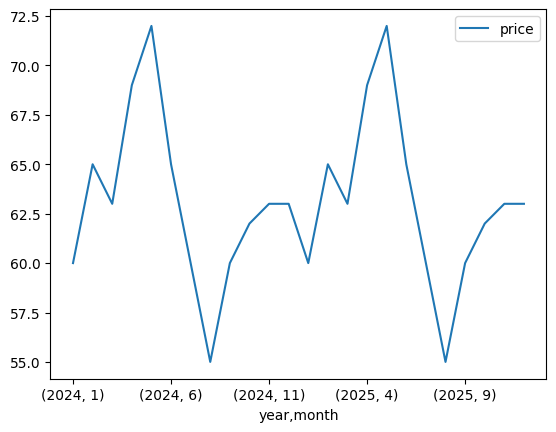

In [141]:
new_oil_prices.set_index(['year', 'month']).plot.line()

<Axes: title={'center': 'My amazing plot'}, xlabel='year,month'>

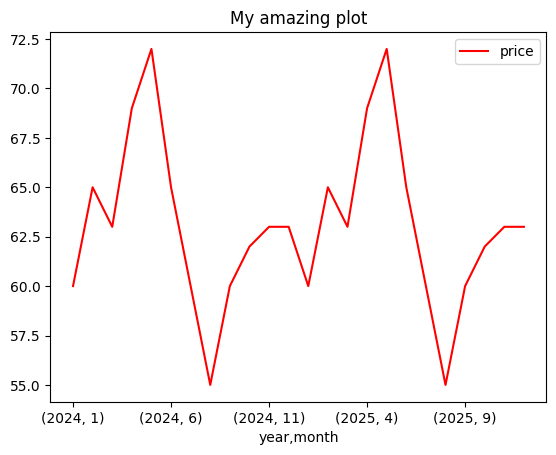

In [144]:
(
    new_oil_prices
    .set_index(['year', 'month'])
    .plot.line(title='My amazing plot',
               color='red')
)

In [145]:
new_oil_prices['tax'] = new_oil_prices['price'] * 0.15

<Axes: title={'center': 'My amazing plot'}, xlabel='year,month'>

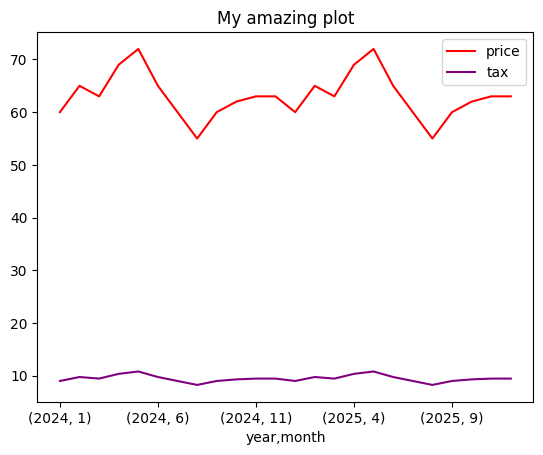

In [147]:
# replot, but now we have *two* columns

(
    new_oil_prices
    .set_index(['year', 'month'])
    .plot.line(title='My amazing plot',
               color=['red', 'purple'])
)

<Axes: xlabel='year,month'>

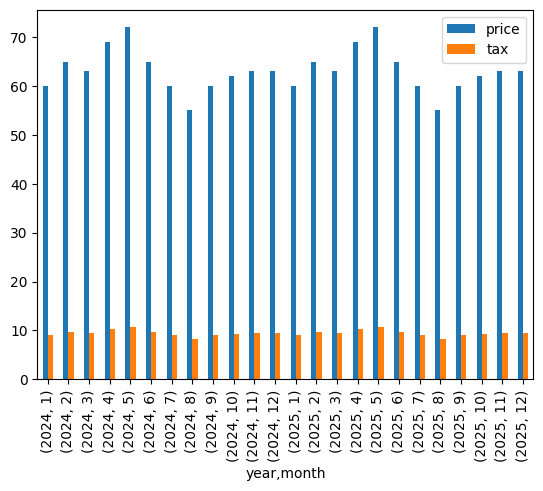

In [148]:
# we can use plot.bar to get a bar plot!

(
    new_oil_prices
    .set_index(['year', 'month'])
    .plot.bar()
)

<Axes: xlabel='year,month'>

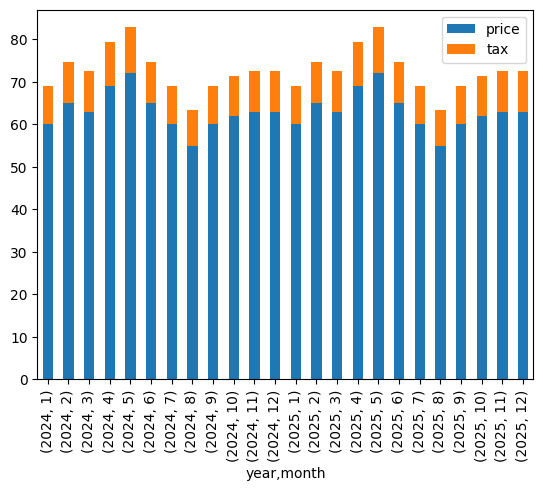

In [149]:
# what we really want is to see the total price, the original price + the tax


(
    new_oil_prices
    .set_index(['year', 'month'])
    .plot.bar(stacked=True)
)

<Axes: ylabel='year,month'>

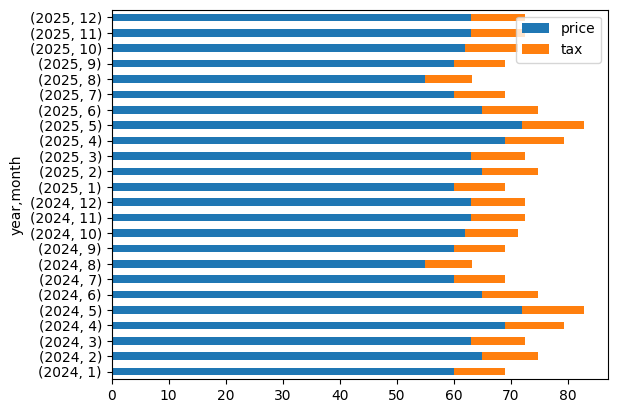

In [150]:
# want a horizontal bar plot? Just use .barh!

(
    new_oil_prices
    .set_index(['year', 'month'])
    .plot.barh(stacked=True)
)

<Axes: ylabel='Frequency'>

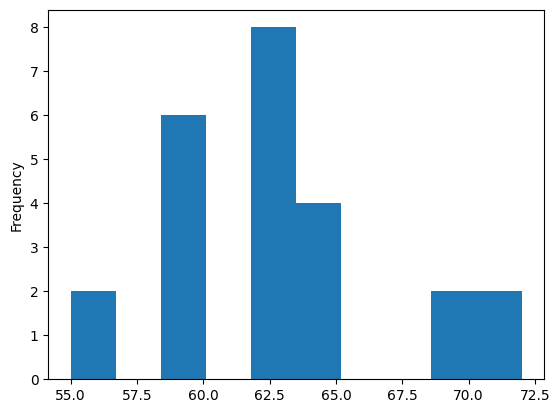

In [152]:
# histogram 

# this divides the range from min to max into 20 "bins," and then shows how many times
# each bin had a price

new_oil_prices['price'].plot.hist()

<Axes: ylabel='Frequency'>

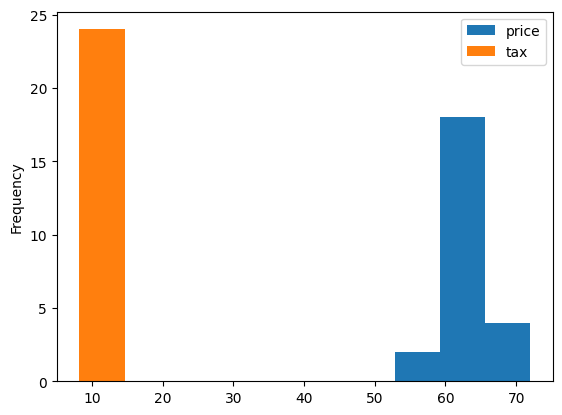

In [154]:
# can we have a histogram on more than one column?

new_oil_prices.set_index(['year', 'month']).plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

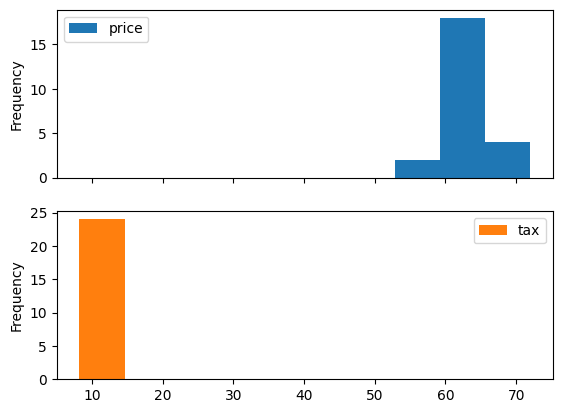

In [155]:
# keep each column in its own subplot with subplots=True

new_oil_prices.set_index(['year', 'month']).plot.hist(subplots=True)

<Axes: >

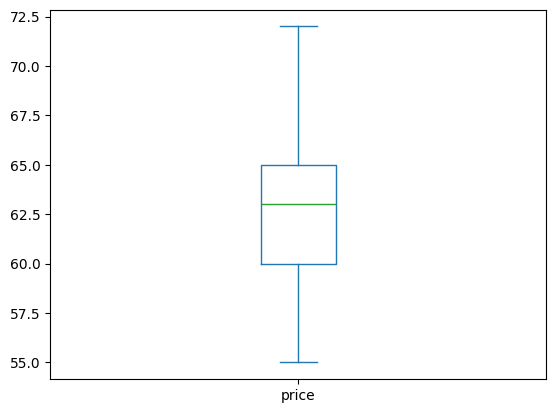

In [156]:
# boxplot -- this is great for statistical purposes. It's the graphical version of .describe()

new_oil_prices['price'].plot.box()

<Axes: >

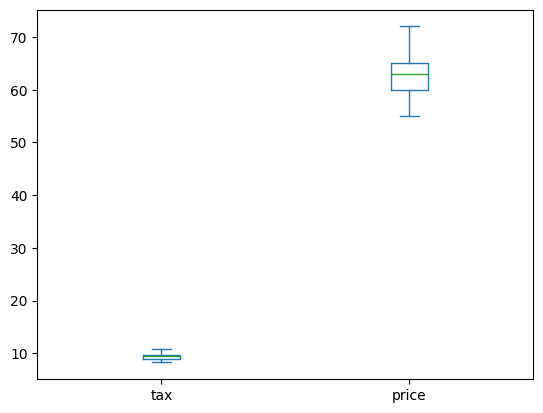

In [157]:
new_oil_prices[['tax', 'price']].plot.box()

<Axes: ylabel='count'>

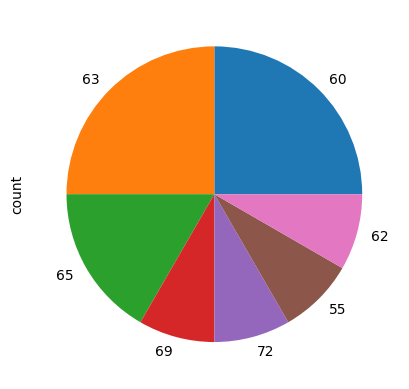

In [160]:
# pie plot
# you often want to run plot.pie on the results of value_counts

new_oil_prices['price'].value_counts().plot.pie()

# Scatter plots

A scatter plot takes two numeric columns from your data frame, and plots them against each other, with one column as the x axis and the other on the y axis.

The main point is to find correlations. If we see a straight line, then we'll know they're highly correlated.

<Axes: xlabel='price', ylabel='tax'>

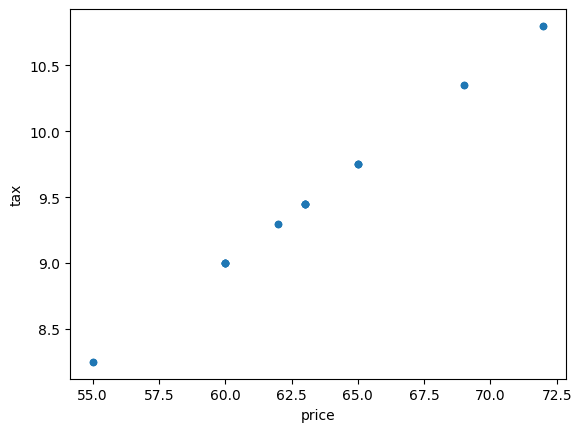

In [161]:
new_oil_prices.plot.scatter(x='price', y='tax')

<Axes: xlabel='price', ylabel='tax'>

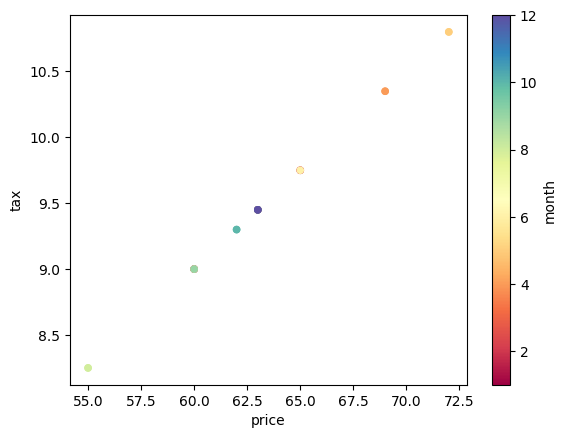

In [163]:
new_oil_prices.plot.scatter(x='price', y='tax', 
                            c='month', colormap='Spectral')   #color it by month!

# Exercise: Plotting practice

1. Load the taxi data into a data frame.
2. Create a histogram showing how often each `total_amount` shows up in the data. Then do two histograms in subplots, one for `total_amount` and one for `trip_distance`.
3. Create a pie plot showing how often each `passenger_count` appears in the data set.
4. Create a stacked bar plot showing, for the first 50 rides (not more!), the combination of `fare_amount`, `tip_amount`, and other payment-related columns.
5. Finally, create a scatterplot comparing `trip_distance` and `total_amount`.

In [164]:
df = pd.read_csv('taxi.csv')

<Axes: ylabel='Frequency'>

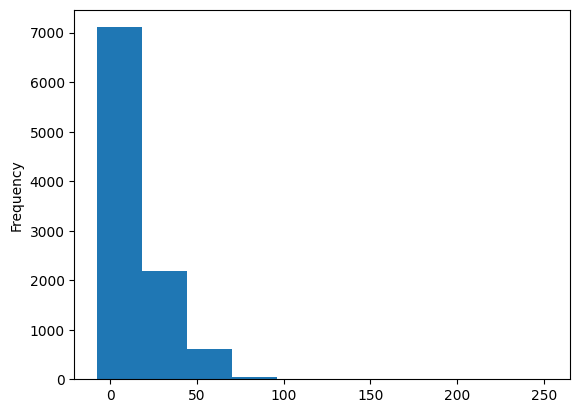

In [166]:
# Create a histogram showing how often each total_amount shows up in the data. Then do two histograms in subplots,
# one for total_amount and one for trip_distance.

df['total_amount'].plot.hist() 

<Axes: ylabel='count'>

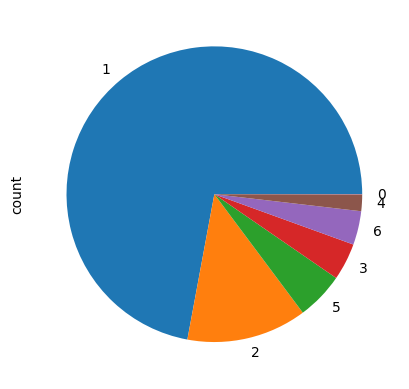

In [168]:
# Create a pie plot showing how often each passenger_count appears in the data set.

df['passenger_count'].value_counts().plot.pie()

<Axes: >

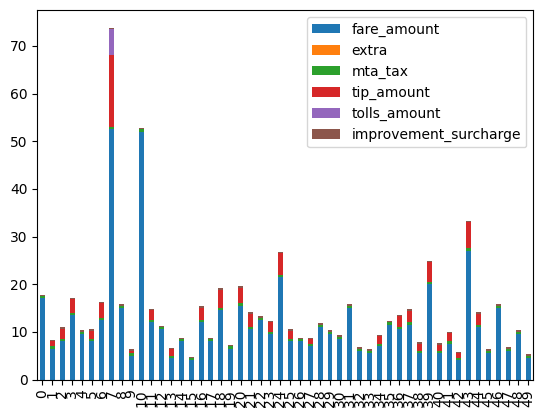

In [171]:
# Create a stacked bar plot showing, for the first 50 rides (not more!), the combination of fare_amount, 
# tip_amount, and other payment-related columns.

(
    df
    .iloc[:50]
    [['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']]
    .plot.bar(stacked=True)
)

<Axes: xlabel='trip_distance', ylabel='total_amount'>

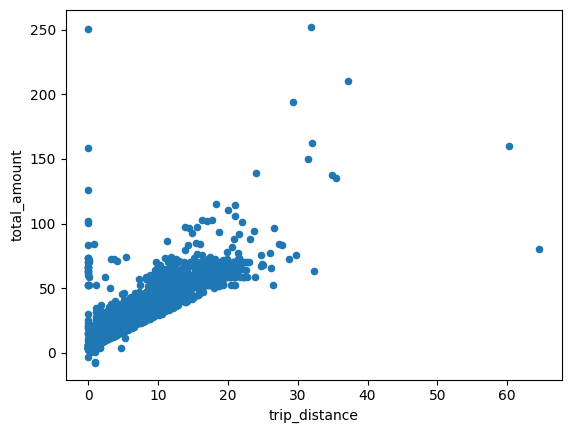

In [172]:
# Finally, create a scatterplot comparing trip_distance and total_amount.

df.plot.scatter(x='trip_distance', y='total_amount')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

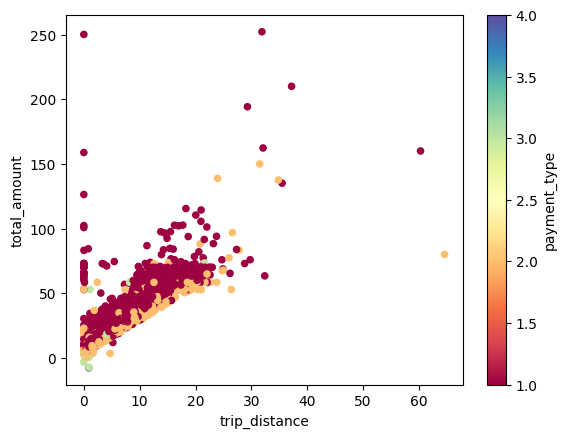

In [174]:
df.plot.scatter(x='trip_distance', y='total_amount', c='payment_type', colormap='Spectral')

# What if you want something else?

- You can learn Matplotlib.
- There's also a library called Seaborn that is very Pandas friendly and gives nicer output than Matplotlib, but has a very different API.
- I've recently started to use Plotly. I really love it.

# Next steps

1. Practice practice practice practice. Pandas Workout (my book) is a good place. My Bamboo Weekly newsletter. 